In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing,

## Model for Perceptron


We looked at the implementation of the perceptron algorithm in our lecture. We learned about two main types of perceptron
* Batch perceptron
* Stochastic perceptron


In the below notebook, we will implement both batch and stochastic perceptron algorithms.

Steps on how to proceed: 

* Complete the code in class `Perceptron` using `Batch Perceptron`. check the results, note the accuracy and mention it in the last cell under "Batch Perceptron Accuracy"" 
* Complete the code in class `Perceptron` using `Stochastic Perceptron`. check the results, note the accuracy and mention it in the last cell under "Stochastic Perceptron Accuracy""

In [2]:
class Perceptron:
    """
    Stocastic Perceptron neuron
    """

    def __init__(self, learning_rate=0.1):
        """
        instantiate a new Perceptron

        :param learning_rate: coefficient used to tune the model
        response to training data
        """
        self.learning_rate = 0.1
        self._b =  0 # y-intercept
        self._w = None   # weights assigned to input features
        # count of errors during each iteration
        self.misclassified_samples = []

    def fit(self, x: np.array, y: np.array, n_iter=10):
        """
        fit the Perceptron model on the training data

        :param x: samples to fit the model on
        :param y: labels of the training samples
        :param n_iter: number of training iterations 
        """
        self._b = 1
        self._w = np.ones((x.shape[1],1))
        self.misclassified_samples = []

        for _ in range(n_iter):
            
            ####### YOUR CODE HERE #######
            errors = 0;
            print(self._w)
            for index in  range(x.shape[0]):
                x_ = x[index]
                y_predict = self.predict(x_)
                y_ = y[index]
                if y_ != y_predict:
                    errors +=1;
                    self.update_weights(x_, y_)
                    self._b += self.learning_rate*y_
            ####### END YOUR CODE HERE #######
            self.misclassified_samples.append(errors)

    def f(self, x: np.array) -> float:
        """
        compute the output of the neuron
        :param x: input features
        :return: the output of the neuron
        """
        
        ####### YOUR CODE HERE #######
        return sum(np.dot(x, self.w)+self._b)
    
        ####### END YOUR CODE HERE #######

    def predict(self, x: np.array):
        """
        convert the output of the neuron to a binary output
        :param x: input features
        :return: 1 if the output for the sample is positive (or zero),
        -1 otherwise
        """
        output_layer = np.dot(x, self._w)
        output = np.sum(output_layer)
        
        ####### YOUR CODE HERE #######
        if output >= 0:
            return 1
        else:
            return -1
        ####### END YOUR CODE HERE #######
    def update_weights(self,x,y):
        for i in range(len(self._w)):
            self._w[i] = self._w[i]+self.learning_rate*x[i]*y
        

In [3]:
import pandas as pd
###### YOUR CODE HERE ######

df = pd.read_csv("iris.data.csv") ###### Read iris data set using pandas ######

###### YOUR CODE ENDS HERE ######
df.tail()

,5.1,3.5,1.4,0.2,Iris-setosa
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


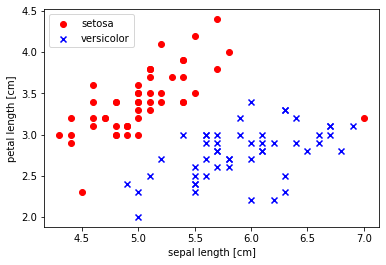

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
###### YOUR CODE HERE ######
####select Iris-setosa using np.where. Make sure you take extra care of the indexing####
y =  df["Iris-setosa"]
###### YOUR CODE ENDS HERE ######



###### YOUR CODE HERE ######
# extract sepal length and petal length
X = df[["5.1", "3.5","1.4", "0.2"]].to_numpy()
###### YOUR CODE ENDS HERE ######

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

#plt.savefig('images/02_06.png', dpi=300)
plt.show()
y= np.array( [1 if i == 'Iris-setosa' else -1 for i in y])

[[1.]
 [1.]
 [1.]
 [1.]]
[[-1.03]
 [ 0.05]
 [-0.41]
 [ 0.56]]
[[-0.77]
 [ 0.35]
 [-0.61]
 [ 0.46]]
[[-0.49]
 [ 0.64]
 [-0.79]
 [ 0.35]]
[[-0.7 ]
 [ 0.62]
 [-1.12]
 [ 0.23]]
[[-0.46]
 [ 0.83]
 [-1.32]
 [ 0.14]]
[[ 0.03]
 [ 1.13]
 [-1.18]
 [ 0.16]]
[[ 0.03]
 [ 1.13]
 [-1.18]
 [ 0.16]]
[[ 0.03]
 [ 1.13]
 [-1.18]
 [ 0.16]]
[[ 0.03]
 [ 1.13]
 [-1.18]
 [ 0.16]]


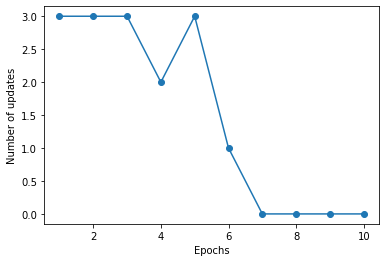

In [5]:
classifier = Perceptron(learning_rate=0.01)

classifier.fit(X, y)

plt.plot(range(1, len(classifier.misclassified_samples) + 1), classifier.misclassified_samples, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [37]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

In [38]:
plot_decision_regions(X, y, classifier=classifier)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

ValueError: shapes (61600,2) and (4,1) not aligned: 2 (dim 1) != 4 (dim 0)

### Bonus: Implement the changes of decision boundary at each iteration
modify your fit method to demonstrate how the decision boundary changes at each iteration.

/var/folders/zx/7f5hrldd0f3f7d6cvmhrtjt00000gn/T/ipykernel_84495/3926436729.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


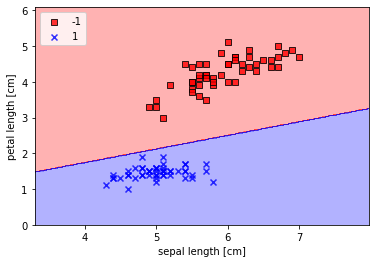

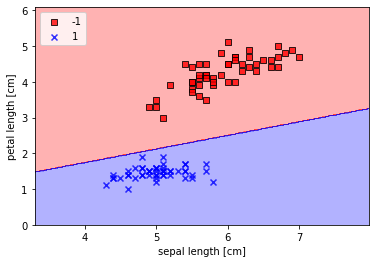

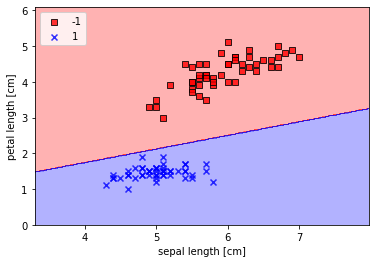

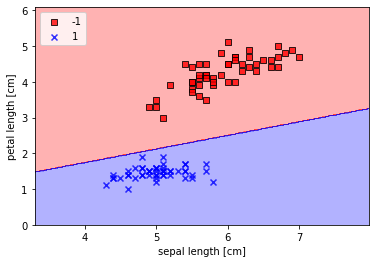

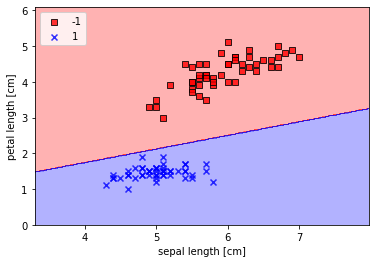

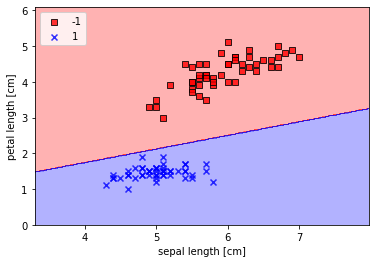

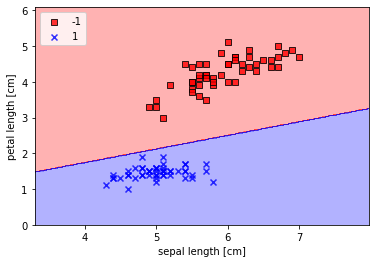

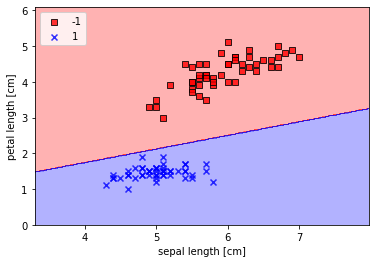

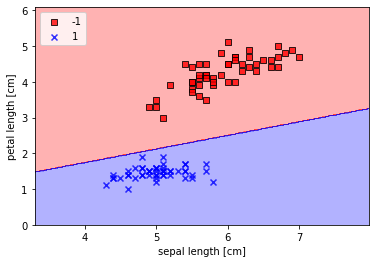

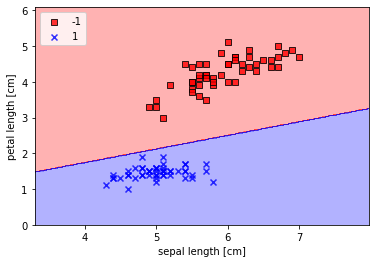

In [23]:
####Note that Perceptron class has "n_features" attribute which is the number of features in the dataset.

classifier = Perceptron(learning_rate=0.001, n_features=2)
for i in range(0, 10):
    classifier.fit(X, y)
    plot_decision_regions(X, y, classifier=classifier)
    plt.xlabel('sepal length [cm]')
    plt.ylabel('petal length [cm]')
    plt.legend(loc='upper left')
    plt.show()

Batch Perceptron Accuracy:

Stocastic Perceptron Accuracy: 